This program is designed to collect the MRMS data needed for the stats project

In [39]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import datetime
import imageio as img
import os

In [40]:
#Variables
input_source = '/localdata/Stats_Project/20180519/MESH/'
output_source = '/localdata/Stats_Project/20180519/'

nw_lat = 40.58
nw_lon = -95.37
se_lat = 40.12
se_lon = -92.35

In [41]:
var_output = np.empty([0])
times = np.empty([0])

for MRMS_file in os.listdir(input_source):
    nc_file = nc.Dataset(input_source+MRMS_file, 'r')
    var = nc_file.variables['MESH'][:,:]
    u_lat = nc_file.Latitude #Upper-most latitude
    l_lon = nc_file.Longitude #Left-most longitude
    
    #Creating the arrays for the lat and lon coordinates
    y = len(var[:,0])
    x = len(var[0,:])
    lat = np.arange(u_lat, u_lat-(y*0.01),-0.01) #Going from upper to lower
    lon = np.arange(l_lon, l_lon+(x*0.01),0.01) #Going from left to right

    dtime = datetime.datetime.utcfromtimestamp(nc_file.Time)
    times = np.append(times,dtime)
    
    lat_locs = np.where((lat >= se_lat) & (lat <= nw_lat))[0]
    lon_locs = np.where((lon >= nw_lon) & (lon <= se_lon))[0]
    
    var_cut = var[lat_locs,:]
    var_cut = var_cut[:,lon_locs]
    if np.nanmax(var_cut) < -1000:
        var_max = 0
    else:
        var_max = np.nanmax(var_cut)
        
    var_output = np.append(var_output,var_max)


In [42]:
np.savetxt(output_source+'MESH_MAX.txt',var_output)

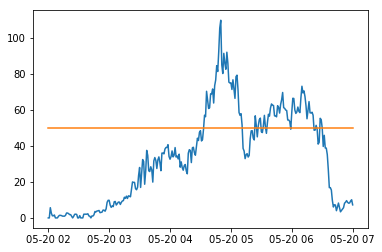

In [43]:
thing = np.ones(len(var_output))*50
plt.plot(times,var_output)
plt.plot(times,thing)
plt.show()

In [44]:
threshold_locs = np.where(var_output > 50)[0]
threshold_times = times[threshold_locs]
#print (threshold_times)
print (threshold_locs)

[154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 204 205 207 208 209 212 213 214 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 264 268 269]


In [45]:
print (times)

[datetime.datetime(2018, 5, 20, 2, 0) datetime.datetime(2018, 5, 20, 2, 1)
 datetime.datetime(2018, 5, 20, 2, 2) datetime.datetime(2018, 5, 20, 2, 3)
 datetime.datetime(2018, 5, 20, 2, 4) datetime.datetime(2018, 5, 20, 2, 5)
 datetime.datetime(2018, 5, 20, 2, 6) datetime.datetime(2018, 5, 20, 2, 7)
 datetime.datetime(2018, 5, 20, 2, 8) datetime.datetime(2018, 5, 20, 2, 9)
 datetime.datetime(2018, 5, 20, 2, 10)
 datetime.datetime(2018, 5, 20, 2, 11)
 datetime.datetime(2018, 5, 20, 2, 12)
 datetime.datetime(2018, 5, 20, 2, 13)
 datetime.datetime(2018, 5, 20, 2, 14)
 datetime.datetime(2018, 5, 20, 2, 15)
 datetime.datetime(2018, 5, 20, 2, 16)
 datetime.datetime(2018, 5, 20, 2, 17)
 datetime.datetime(2018, 5, 20, 2, 18)
 datetime.datetime(2018, 5, 20, 2, 19)
 datetime.datetime(2018, 5, 20, 2, 20)
 datetime.datetime(2018, 5, 20, 2, 21)
 datetime.datetime(2018, 5, 20, 2, 22)
 datetime.datetime(2018, 5, 20, 2, 23)
 datetime.datetime(2018, 5, 20, 2, 24)
 datetime.datetime(2018, 5, 20, 2, 25)
 

In [46]:
print (var_output.shape)

(301,)
